# Q-Commerce

#### Objectives: Improve home delivery service by data insights

##### Imports

In [1]:
#libraries visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statistics import mean
from statistics import *

#preprocessing
from sklearn.preprocessing import StandardScaler
from numpy import asarray

#classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import xgboost as xgb
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

#scores
from sklearn.metrics import f1_score
from sklearn import metrics

#search best parameters
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold

### 1. What are the 3 countries in which the most orders are made?

In [590]:
#import of dataset train
df = pd.read_csv("train.csv")
df.head(3)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus


In [591]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54330 entries, 0 to 54329
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        54330 non-null  int64  
 1   local_time      54330 non-null  object 
 2   country_code    54330 non-null  object 
 3   store_address   54330 non-null  int64  
 4   payment_status  54330 non-null  object 
 5   n_of_products   54330 non-null  int64  
 6   products_total  54330 non-null  float64
 7   final_status    54330 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [592]:
#some statistics about dataset
df.describe()

,order_id,store_address,n_of_products,products_total
count,5.433000e+04,54330.000000,54330.000000,54330.000000
mean,3.278267e+07,41609.384981,2.815792,9.838136
std,4.459402e+05,21903.267141,2.430936,9.260352
min,3.150378e+07,190.000000,1.000000,0.000000
25%,3.240007e+07,21369.000000,1.000000,4.130000
50%,3.278159e+07,45993.500000,2.000000,7.130000
75%,3.318380e+07,62004.000000,3.000000,12.770000
max,3.356085e+07,75236.000000,39.000000,221.480000


In [593]:
#are there any nan values?
df.isnull().values.any()

False

In [595]:
#group by country
x = df.groupby('country_code')[['order_id']].count()
countries_df = x.sort_values(by=['order_id'],ascending=False)
countries_df.head(3)

,order_id
country_code,
AR,11854
ES,11554
TR,5696


#### Solution to task 1: 
1. Argentina (AR) is the country with the most orders made: 11854.
2. Spain has the second position: 11554.
3. Turkey has the third position: 5696.

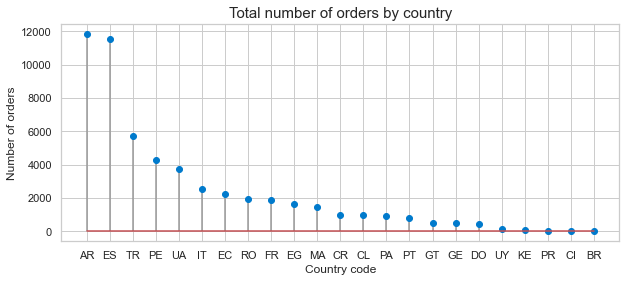

In [596]:
plt.figure(figsize =(10, 4))

#labels for x axis
my_range=range(0,len(countries_df.index))
index = countries_df.index
labels = list(index)

#custom the stem lines
(markers, stemlines, baseline) = plt.stem(countries_df['order_id'])
plt.setp(markers,color='#007acc')
plt.setp(stemlines,color='#999999')

#ticks and description
plt.xticks(my_range, labels)
plt.title("Total number of orders by country",fontsize=15)
plt.xlabel("Country code",fontsize=12)
plt.ylabel("Number of orders",fontsize=12)

plt.show()

### 2. What are the hours when most orders are placed in Spain?

In [597]:
#new df with orderes from Spain
spain_df = df.loc[df['country_code'] == 'ES']
spain_df.head(3)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus
8,32236610,17:09:16,ES,30120,PAID,3,4.35,DeliveredStatus
13,32235607,18:02:18,ES,18682,PAID,9,16.12,DeliveredStatus


In [598]:
#extract the hour to new column
spain_df['hour'] = spain_df['local_time'].str[:2]
spain_df.head(3)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,hour
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,20
8,32236610,17:09:16,ES,30120,PAID,3,4.35,DeliveredStatus,17
13,32235607,18:02:18,ES,18682,PAID,9,16.12,DeliveredStatus,18


In [599]:
#group by hour and sort values
x = spain_df.groupby(by=["hour"]).count()
hours_df = x.sort_values(by=['order_id'],ascending=False)
hours_df.head(10)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
hour,,,,,,,,
20,1716,1716,1716,1716,1716,1716,1716,1716
21,1155,1155,1155,1155,1155,1155,1155,1155
19,1128,1128,1128,1128,1128,1128,1128,1128
13,1047,1047,1047,1047,1047,1047,1047,1047
14,956,956,956,956,956,956,956,956
18,821,821,821,821,821,821,821,821
15,696,696,696,696,696,696,696,696
17,680,680,680,680,680,680,680,680
22,665,665,665,665,665,665,665,665


#### Solution to task 2: 
1. The peak hours for orders are between 19-21h - dinner time.
2. The second position has time between 13-15h - lunch time, in Spain is usual to have longer break for lunch so it's meaningful that people order more during these hours.
3. The third position has time between 18-19h - last hour of work time.

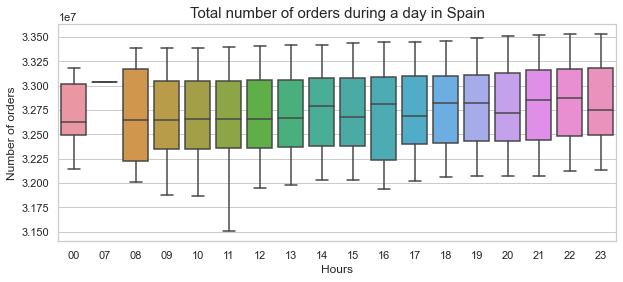

In [601]:
plt.figure(figsize =(10, 4))
#sort df
spain_df["hour"].astype(int)
data = spain_df.sort_values(by=['hour'])

sns.boxplot(x=data["hour"], y=data["order_id"])

#ticks and description
plt.title("Total number of orders during a day in Spain",fontsize=15)
plt.xlabel("Hours",fontsize=12)
plt.ylabel("Number of orders",fontsize=12)

plt.show()

### 3. What is the average price per order in the store with ID 12513?

In [602]:
#new df with orderes from store ID12513
orders_df = df.loc[df['store_address'] == 12513]
orders_df.head(3)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
58,32660725,12:58:13,IT,12513,PAID,2,8.9,DeliveredStatus
69,33112533,19:13:39,IT,12513,PAID,2,14.7,DeliveredStatus
122,33257434,16:16:47,IT,12513,PAID,4,29.0,DeliveredStatus


In [603]:
#how many orders there are
len(orders_df)

245

In [604]:
#use mean function from statistics
print('The average price of all orders is',round(orders_df['products_total'].mean(),2),'euros.')

The average price of all orders is 17.39 euros.


In [605]:
#what's the status of the orders?
orders_df['final_status'].unique()

array(['DeliveredStatus', 'CanceledStatus'], dtype=object)

In [606]:
#how many orders with status delivered
del_orders_df = orders_df.loc[orders_df['final_status'] == 'DeliveredStatus']
#how many orders there are
len(del_orders_df)

239

In [607]:
#use mean function from statistics
print('The average price of delivered orders is',round(del_orders_df['products_total'].mean(),2),'euros.')

The average price of delivered orders is 17.38 euros.


#### Solution to task 3: 
The average price is 17.39 euros. The amount is not significantly influenced by canceled orders.

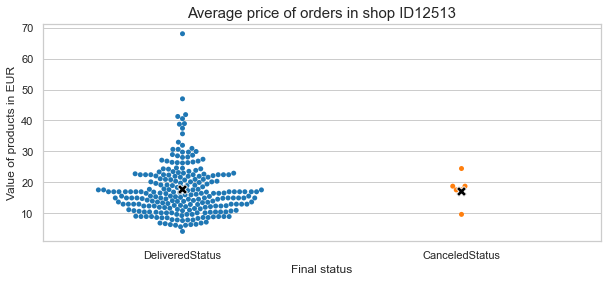

In [608]:
plt.figure(figsize =(10, 4))

#average values
df_means = orders_df.groupby("final_status")["products_total"].agg("mean").reset_index()

ax = sns.scatterplot(x="final_status", y="products_total", marker='X', color='black', s=100, zorder=4, legend=False, data=df_means)
ax = sns.swarmplot(x="final_status", y="products_total", data=orders_df, palette="tab10")

#ticks and description
plt.title("Average price of orders in shop ID12513",fontsize=15)
plt.xlabel("Final status",fontsize=12)
plt.ylabel("Value of products in EUR",fontsize=12)

plt.show()

### 4. What percentage of delivery stuff would you put in for each shift so that they are able to cope with peaks in demand?
Taking into account the peaks of demand in Spain, if the delivery men work 8-hour shifts.
- Shift 1 (00:00-08:00)
- Shift 2 (08:00-16:00)
- Shift 3 (16:00-00:00)

In [609]:
#number of all orders in Spain - 100%
total = len(spain_df)
total

11554

In [610]:
#hours of orders
spain_df['hour'].unique()

array(['20', '17', '18', '14', '21', '16', '19', '15', '10', '22', '13',
       '12', '11', '09', '23', '08', '00', '07'], dtype=object)

In [611]:
#first shift with morning hours
list1 = ['00','07']
shift1 = spain_df[spain_df['hour'].isin(list1)]
shift1_num = len(shift1)
print('Number of orders during Shift 1:', shift1_num)

Number of orders during Shift 1: 14


In [612]:
#second shift
list2 = ['08','09','10','11','12','13','14','15']
shift2 = spain_df[spain_df['hour'].isin (list2)]
shift2_num = len(shift2)
print('Number of orders during Shift 2:',shift2_num)

Number of orders during Shift 2: 4487


In [613]:
#third shift
shift3_num = total - (shift1_num + shift2_num)
print('Number of orders during Shift 2:',shift3_num)

Number of orders during Shift 2: 7053


In [614]:
#percentage
s1 = round((shift1_num*100/total),2)
s2 = round((shift2_num*100/total),2)
s3 = round((shift3_num*100/total),2)
print(s1,s2,s3)

0.12 38.84 61.04


#### Solution to task 4: 
1. shift 00-08h with 0.12% of delivery staff.
2. shift 08-16h with 38.84% of delivery staff.
3. shift 16-00h with 61.04% of delivery staff.

In [615]:
shifts = [shift1_num,shift2_num,shift3_num]
shifts

[14, 4487, 7053]

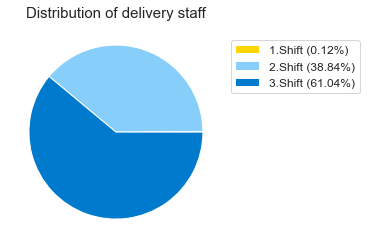

In [616]:
plt.figure(figsize =(10, 4))

#labels
labels = [r'1.Shift (0.12%)', r'2.Shift (38.84%)', r'3.Shift (61.04%)']
colors = ['gold', 'lightskyblue', '#007acc']

plt.pie(shifts,colors=colors)

#title and description
plt.legend(labels,bbox_to_anchor=(1.00, 0.95),fontsize=12)
plt.title("Distribution of delivery staff",fontsize=15)

plt.show()

### 5. Performs a predictive machine learning model.
The order will be canceled or not (column 'final_status')? The quality of the prediction will be measured from the f1-score.

In [124]:
#import train dataset
df = pd.read_csv("train.csv")
#import variables for prediction
X_test_df = pd.read_csv("test_X.csv", delimiter=';')

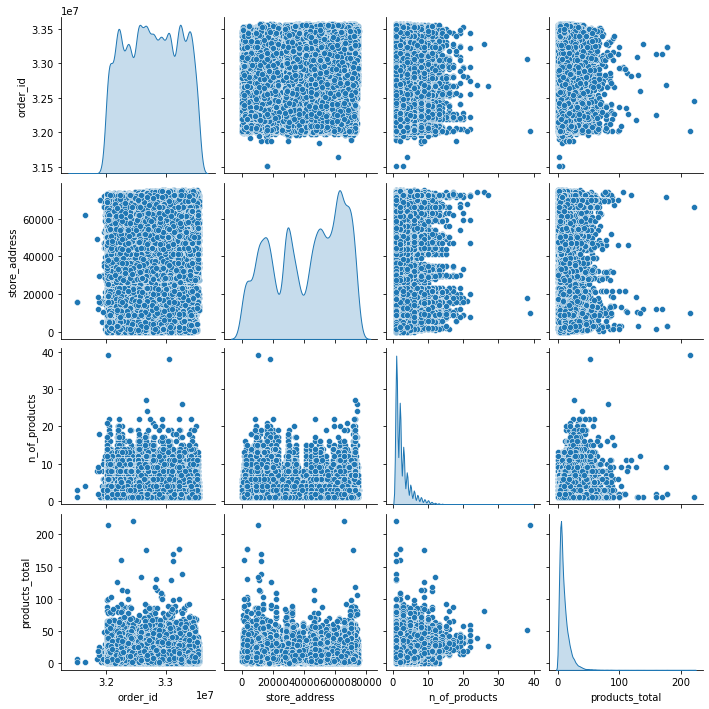

In [66]:
#Relationships between features - is data normally distributed?
sns.pairplot(df,diag_kind='kde')
plt.show()

The data distribution is not Gaussian, that's why I need to use normalizing for the predictive model. Another aspect is that the target is binominal - I will be looking for classification machine learning model.

In [125]:
#countries which are in the train dataset
countries1 = df['country_code'].unique()
countries1

array(['AR', 'GT', 'CR', 'ES', 'PE', 'PA', 'FR', 'IT', 'TR', 'EC', 'RO',
       'KE', 'UA', 'PT', 'DO', 'GE', 'MA', 'PR', 'CL', 'EG', 'UY', 'CI',
       'BR'], dtype=object)

In [126]:
#countries which are in the final X_test dataset
countries2 = X_test_df['country_code'].unique()
countries2

array(['MA', 'ES', 'IT', 'AR', 'TR', 'EC', 'PA', 'UA', 'DO', 'EG', 'PE',
       'FR'], dtype=object)

In [127]:
#remove data about countries which are not in test dataset
list3 = list(countries2)
new_df = df.copy()
new_df = new_df[new_df['country_code'].isin (list3)]
#confirm that only countries of final X_test dataset are included
new_df['country_code'].unique()

array(['AR', 'ES', 'PE', 'PA', 'FR', 'IT', 'TR', 'EC', 'UA', 'DO', 'MA',
       'EG'], dtype=object)

In [128]:
#simplification of final status
new_df["final_status"].replace({"DeliveredStatus": 1, "CanceledStatus": 0}, inplace=True)
new_df.head()

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
0,33446280,14:11:09,AR,55379,PAID,2,11.88,1
3,32089564,20:15:21,ES,29446,PAID,6,6.37,1
4,32157739,21:32:16,AR,13917,PAID,1,5.36,0
5,33214981,22:34:52,PE,11694,PAID,2,4.85,1
6,32951974,12:03:05,PA,69823,PAID,3,23.63,1


In [129]:
#Stratified random sample - important to keep the proportion of status canceled and delivered
group1 = new_df[new_df['final_status'] == 1]
group2 = new_df[new_df['final_status'] == 0]
x = round(len(group1) / len(df) * 100)
print('Percentage of delivered status is',x,'%')

Percentage of delivered status is 79 %


In [130]:
#In total 1000 samples: 790 delivered and 210 canceled
df1 = group1.sample(n = 790)
df2 = group2.sample(n = 210)
df_sample = df1.append(df2,ignore_index = True)

In [131]:
#divide df - final status keep for later
df_final_status = df_sample['final_status']
df_sample = df_sample.drop(['final_status'],axis=1)

In [132]:
#preprocessing function
def myfunc1(df_sample):
    
    #simplification of country_code
    dummy1 = pd.get_dummies(df_sample['country_code'])
    df_sample = df_sample.merge(dummy1, left_index=True, right_index=True)
    df_sample.drop(['country_code'], axis=1, inplace=True)
    
    #simplification of time
    df_sample['hour'] = df_sample['local_time'].str[:2]
    df_sample['min'] = df_sample['local_time'].str[3:5]
    df_sample['sec'] = df_sample['local_time'].str[6:]

    #drop column local time
    df_sample.drop(['local_time'], axis=1, inplace=True)

    #convert to int value
    df_sample["hour"] = df_sample["hour"].astype(int)
    df_sample["min"] = df_sample["min"].astype(int)
    df_sample["sec"] = df_sample["sec"].astype(int)
    
    #simplification of payment_status
    df_sample["payment_status"].replace({"PAID": 1, "NOT_PAID": -1, "DELAYED": 0 }, inplace=True)
    
    #standartization
    scaler = StandardScaler()
    data = asarray(df_sample)
    df_sample = pd.DataFrame(scaler.fit_transform(data),columns=df_sample.columns)
    
    return df_sample

In [133]:
#calling function and see output
df_sample = myfunc1(df_sample)
df_sample.head()

,order_id,store_address,payment_status,n_of_products,products_total,AR,DO,EC,EG,ES,FR,IT,MA,PA,PE,TR,UA,hour,min,sec
0,-1.250102,0.171113,0.095298,0.828675,1.007777,-0.560411,-0.095298,-0.201452,-0.226991,-0.568112,-0.193247,-0.243561,-0.190445,-0.119159,3.051111,-0.335182,-0.296883,-1.242061,0.146818,1.228362
1,1.200048,-0.854177,0.095298,-0.749753,-0.387038,1.784405,-0.095298,-0.201452,-0.226991,-0.568112,-0.193247,-0.243561,-0.190445,-0.119159,-0.327749,-0.335182,-0.296883,-0.334453,0.263433,-0.253997
2,0.400118,1.489893,0.095298,-0.749753,-0.963357,-0.560411,-0.095298,-0.201452,-0.226991,-0.568112,-0.193247,-0.243561,-0.190445,-0.119159,-0.327749,-0.335182,3.368335,0.119350,0.205126,-0.425038
3,0.585512,0.384474,0.095298,1.617889,1.372575,-0.560411,10.493384,-0.201452,-0.226991,-0.568112,-0.193247,-0.243561,-0.190445,-0.119159,-0.327749,-0.335182,-0.296883,0.573154,0.846509,1.114335
4,0.295080,0.722755,0.095298,-0.355146,-0.489222,-0.560411,-0.095298,4.963973,-0.226991,-0.568112,-0.193247,-0.243561,-0.190445,-0.119159,-0.327749,-0.335182,-0.296883,0.800056,0.146818,0.088086


In [253]:
#Decision Tree Classifier - GridSearch process
parameters = {'max_depth':range(3,20),
             'criterion':['gini', 'entropy'],
             'splitter':['best', 'random']}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4, cv=10)
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.7971428571428572 {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}


In [254]:
#Cross Validation - Decision Tree
#Create classifier object - using parameters defined from GridSearch
model1 = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='random', random_state=42)

#Stratified k-Fold - large imbalance of the target value in the dataset
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
model1_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model1.fit(x_train_fold, y_train_fold)
    model1_accu_stratified.append(model1.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', model1_accu_stratified)
print('Maximum Accuracy That can be obtained from this model is:',
      max(model1_accu_stratified)*100, '%')
print('Minimum Accuracy:',
      min(model1_accu_stratified)*100, '%')
print('Overall Accuracy:',
      mean(model1_accu_stratified)*100, '%')
print('Standard Deviation is:', stdev(model1_accu_stratified))

List of possible accuracy: [0.77, 0.79, 0.78, 0.81, 0.79, 0.79, 0.78, 0.79, 0.79, 0.79]
Maximum Accuracy That can be obtained from this model is: 81.0 %
Minimum Accuracy: 77.0 %
Overall Accuracy: 78.8 %
Standard Deviation is: 0.010327955589886454


In [228]:
#XGBoost - GridSearch process
parameters = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7],
           'objective':['reg:squarederror', 'reg:logistic']}

clf = GridSearchCV(xgb.XGBClassifier(), parameters, n_jobs=4)
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.8114285714285716 {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'objective': 'reg:logistic'}


In [229]:
#Cross Validation - XGBoost
#Create classifier object - using parameters defined from GridSearch
model2 = xgb.XGBClassifier(colsample_bytree=0.3,learning_rate=0.1,max_depth=10,n_estimators=100,objective='reg:logistic')

#Stratified k-Fold
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
model2_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model2.fit(x_train_fold, y_train_fold)
    model2_accu_stratified.append(model2.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', model2_accu_stratified)
print('Maximum Accuracy That can be obtained from this model is:',
      max(model2_accu_stratified)*100, '%')
print('Minimum Accuracy:',
      min(model2_accu_stratified)*100, '%')
print('Overall Accuracy:',
      mean(model2_accu_stratified)*100, '%')
print('Standard Deviation is:', stdev(model2_accu_stratified))

List of possible accuracy: [0.78, 0.7, 0.74, 0.8, 0.79, 0.76, 0.76, 0.76, 0.74, 0.81]
Maximum Accuracy That can be obtained from this model is: 81.0 %
Minimum Accuracy: 70.0 %
Overall Accuracy: 76.4 %
Standard Deviation is: 0.03272783388968957


In [255]:
#SVM - GridSearch process
parameters = {'kernel': ['linear','rbf','sigmoid'],
              'coef0': [0.00, 0.05, 1.0, 2.0,],
              'C': [0.05, 0.5, 1.0, 1.5, 2.0, 2.5]}

clf = GridSearchCV(svm.SVC(), parameters, n_jobs=4, cv=10)
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8014285714285714 {'C': 1.0, 'coef0': 0.0, 'kernel': 'rbf'}


In [256]:
#Cross Validation - SVM
#Create classifier object - using parameters defined from GridSearch
model3 = svm.SVC(C=1.0, coef0=0.0, kernel='rbf',random_state=42)

#Stratified k-Fold
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
model3_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model3.fit(x_train_fold, y_train_fold)
    model3_accu_stratified.append(model3.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', model3_accu_stratified)
print('Maximum Accuracy That can be obtained from this model is:',
      max(model3_accu_stratified)*100, '%')
print('Minimum Accuracy:',
      min(model3_accu_stratified)*100, '%')
print('Overall Accuracy:',
      mean(model3_accu_stratified)*100, '%')
print('Standard Deviation is:', stdev(model3_accu_stratified))

List of possible accuracy: [0.78, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.78, 0.79]
Maximum Accuracy That can be obtained from this model is: 79.0 %
Minimum Accuracy: 78.0 %
Overall Accuracy: 78.8 %
Standard Deviation is: 0.004216370213557843


In [257]:
#KNN - GridSearch process
parameters = {'n_neighbors': [5, 11, 15],
              'weights': ['distance', 'uniform'],
              'leaf_size': [30, 50, 80, 100]}

clf = GridSearchCV(KNeighborsClassifier(), parameters, n_jobs=4, cv=10)
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8057142857142857 {'leaf_size': 30, 'n_neighbors': 15, 'weights': 'uniform'}


In [258]:
#Cross Validation - KNN
#Create classifier object - using parameters defined from GridSearch
model4 = KNeighborsClassifier(leaf_size=30, n_neighbors=15, weights='uniform')

#Stratified k-Fold
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
model4_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model4.fit(x_train_fold, y_train_fold)
    model4_accu_stratified.append(model4.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', model3_accu_stratified)
print('Maximum Accuracy That can be obtained from this model is:',
      max(model4_accu_stratified)*100, '%')
print('Minimum Accuracy:',
      min(model4_accu_stratified)*100, '%')
print('Overall Accuracy:',
      mean(model4_accu_stratified)*100, '%')
print('Standard Deviation is:', stdev(model4_accu_stratified))

List of possible accuracy: [0.78, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.78, 0.79]
Maximum Accuracy That can be obtained from this model is: 80.0 %
Minimum Accuracy: 76.0 %
Overall Accuracy: 78.60000000000001 %
Standard Deviation is: 0.014298407059684824


In [259]:
#predictions for each model
#model1
y_pred1 = model1.predict(X_test)
#model2
predictions = model2.predict(X_test)
y_pred2 = [round(value) for value in predictions]
#model3
y_pred3 = model3.predict(X_test)
#model4
y_pred4 = model4.predict(X_test)

In [260]:
#[true negative, false positive],[false negative, true positive]
m1 = metrics.confusion_matrix(y_test, y_pred1)
m2 = metrics.confusion_matrix(y_test, y_pred2)
m3 = metrics.confusion_matrix(y_test, y_pred3)
m4 = metrics.confusion_matrix(y_test, y_pred4)
print('Matrix Decision Tree model:',m1)
print('Matrix XGBoost model:',m2)
print('Matrix SVM model:',m3)
print('Matrix KNN model:',m4)

Matrix Decision Tree model: [[  5  63]
 [  6 226]]
Matrix XGBoost model: [[ 63   5]
 [  0 232]]
Matrix SVM model: [[  3  65]
 [  0 232]]
Matrix KNN model: [[  1  67]
 [  5 227]]


It's important to consider false positives - marked as delivered but should have canceled status. XGBoost model has very low false positive score, the second one is Decision Tree model.

In [261]:
s1 = m1[1,1] / (m1[1,1] + m1[1,0])
s2 = m2[1,1] / (m2[1,1] + m2[1,0])
s3 = m3[1,1] / (m3[1,1] + m3[1,0])
s4 = m4[1,1] / (m4[1,1] + m4[1,0])
print('Sensitivity Decision Tree model:',s1)
print('Sensitivity XBoost model:',s2)
print('Sensitivity SVM model:',s3)
print('Sensitivity KNN model:',s4)

Sensitivity Decision Tree model: 0.9741379310344828
Sensitivity XBoost model: 1.0
Sensitivity SVM model: 1.0
Sensitivity KNN model: 0.978448275862069


In [262]:
f1 = f1_score(y_test, y_pred1)
f2 = f1_score(y_test, y_pred2)
f3 = f1_score(y_test, y_pred3)
f4 = f1_score(y_test, y_pred4)
print('F1 score Decision Tree model:',f1)
print('F1 score XGBoost model:',f2)
print('F1 score SVM model:',f3)
print('F1 score KNN model:',f4)

F1 score Decision Tree model: 0.8675623800383877
F1 score XGBoost model: 0.9893390191897655
F1 score SVM model: 0.8771266540642723
F1 score KNN model: 0.8631178707224334


Conclusion: 
XGBoost model has the best results in f1 score, good overall accuracy and very good sensitivity score. Let's use it for final prediction.

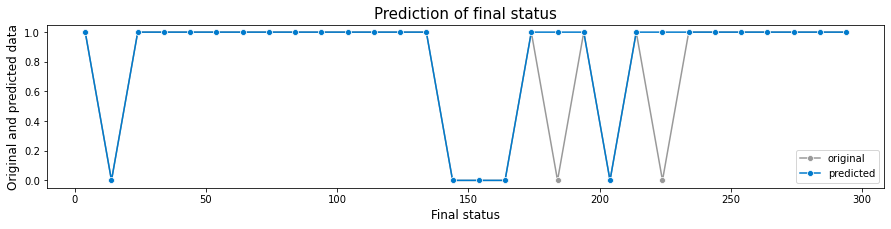

In [272]:
#compare values from test and predict for SVM model
y1 = y_test.reset_index(drop=True)
y2 = pd.Series(y_pred2)

#for simple visualization let's take sistematic sample
step_num = 10
def randomNum():
    num = np.random.randint(1, 10)
    return num
num = randomNum()

simple_df1 = y1[num:len(y1):step_num]
simple_df2 = y2[num:len(y2):step_num]

plt.figure(figsize =(15, 3))

sns.lineplot(data=simple_df1, color='#999999',label='original', marker='o')
sns.lineplot(data=simple_df2, color='#007acc',label='predicted', marker='o')
plt.title("Prediction of final status",fontsize=15)
plt.xlabel("Final status",fontsize=12)
plt.ylabel("Original and predicted data",fontsize=12)

plt.show()

In [268]:
#preprocessing of final X_test - use of function created before for training dataset
df_test = myfunc1(X_test_df)

In [269]:
#final prediction for provided dataset of 30 values
prediction = model2.predict(df_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0])

In [270]:
prediction = pd.DataFrame(data = prediction,columns=['final_status'])
prediction.to_csv('final_prediction.csv',index=False)

#### Solution to task 5:

In [271]:
prediction

,final_status
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,0
9,1
